In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt 

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import InterclusterDistance, KElbowVisualizer, SilhouetteVisualizer

mpl.rcParams["figure.figsize"] = (9,6)

# Yellowbrick &mdash; Clustering Evaluation Examples

The Yellowbrick library is a diagnostic visualization platform for machine learning that allows data scientists to steer the model selection process. It extends the scikit-learn API with a new core object: the `Visualizer`. Visualizers allow models to be fit and transformed as part of the scikit-learn pipeline process, providing visual diagnostics throughout the transformation of high-dimensional data.

In machine learning, clustering models are unsupervised methods that attempt to detect patterns in unlabeled data. There are two primary classes of clustering algorithms: *agglomerative* clustering which links similar data points together, and *centroidal* clustering which attempts to find centers or partitions in the data.

Currently, Yellowbrick provides several visualizers to evaluate *centroidal* mechanisms, particularly K-Means clustering, that help users discover an optimal $K$ parameter in the clustering metric:
- `KElbowVisualizer` &mdash; visualizes the clusters according to a scoring function, looking for an "elbow" in the curve
- `SilhouetteVisualizer` &mdash; visualizes the silhouette scores of each cluster in a single model
- `InterclusterDistance` &mdash; visualizes the relative distance and size of clusters

### Load the Data

For `KElbowVisualizer` and `SilhouetteVisualzer` examples, we'll use scikit-learn's `make_blobs()` function to create a sample two-dimensional dataset with 8 random clusters of points.

In [3]:
# Load project data
from library.common import Core
from sklearn.preprocessing import StandardScaler, QuantileTransformer, MaxAbsScaler
scaler = MaxAbsScaler()
core=Core()
df = core.get_cluster_data(2018).reset_index(drop = True)
# df = df[~df.iso_code.isin(['CHN', 'USA'])]
X = df.drop(['iso_code', 'year'], axis = 1).copy()

for f in X.columns:
    X_array = X[f].to_numpy()
    X_array = X_array.reshape(-1, 1)
    X[f] = scaler.fit_transform(X_array)


## Elbow Method 

K-Means is a simple unsupervised machine learning algorithm that groups data into the number $K$ of clusters specified by the user, even if it is not the optimal number of clusters for the dataset. 

Yellowbrick's `KElbowVisualizer` implements the “elbow” method of selecting the optimal number of clusters by fitting the K-Means model with a range of values for $K$. If the line chart looks like an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point.

In the following example, the `KElbowVisualizer` fits the model for a range of $K$ values from 4 to 11, which is set by the parameter `k=(4,12)`. When the model is fit with 8 clusters we can see an "elbow" in the graph, which in this case we know to be the optimal number since we created our synthetic dataset with 8 clusters of points. 

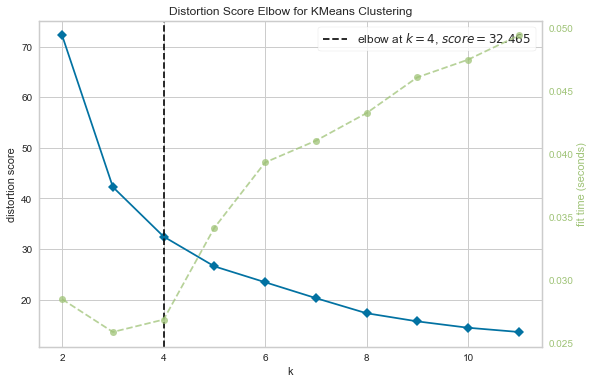

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [4]:
# Instantiate the clustering model and visualizer
clustering_range = (2, 12)
model = KMeans()
visualizer = KElbowVisualizer(model, k=clustering_range)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

By default, the scoring parameter `metric` is set to `distortion`, which computes the sum of squared distances from each point to its assigned center. However, two other metrics can also be used with the `KElbowVisualizer`&mdash;`silhouette` and `calinski_harabasz`. The `silhouette` score is the mean silhouette coefficient for all samples, while the `calinski_harabasz` score computes the ratio of dispersion between and within clusters.
 
The `KElbowVisualizer` also displays the amount of time to fit the model per $K$, which can be hidden by setting `timings=False`. In the following example, we'll use the `calinski_harabasz` score and hide the time to fit the model.

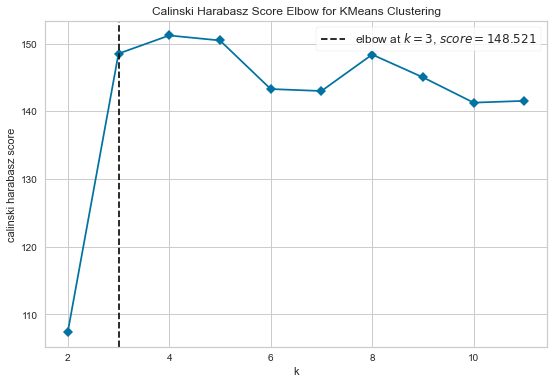

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [5]:
# Instantiate the clustering model and visualizer 
model = KMeans()
visualizer = KElbowVisualizer(model, k=clustering_range, metric='calinski_harabasz', timings=False)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

It is important to remember that the Elbow method does not work well if the data is not very clustered. In this case, you might see a smooth curve and the optimal value of $K$ will be unclear.

You can learn more about the Elbow method at Robert Grove's [Blocks](https://bl.ocks.org/rpgove/0060ff3b656618e9136b).

## Silhouette Visualizer 

Silhouette analysis can be used to evaluate the density and separation between clusters. The score is calculated by averaging the silhouette coefficient for each sample, which is computed as the difference between the average intra-cluster distance and the mean nearest-cluster distance for each sample, normalized by the maximum value. This produces a score between -1 and +1, where scores near +1 indicate high separation and scores near -1 indicate that the samples may have been assigned to the wrong cluster.

The `SilhouetteVisualizer` displays the silhouette coefficient for each sample on a per-cluster basis, allowing users to visualize the density and separation of the clusters. This is particularly useful for determining cluster imbalance or for selecting a value for $K$ by comparing multiple visualizers.

Since we created the sample dataset for these examples, we already know that the data points are grouped into 8 clusters. So for the first `SilhouetteVisualizer` example, we'll set $K$ to 8 in order to show how the plot looks when using the optimal value of $K$. 

Notice that graph contains homogeneous and long silhouettes. In addition, the vertical red-dotted line on the plot indicates the average silhouette score for all observations.

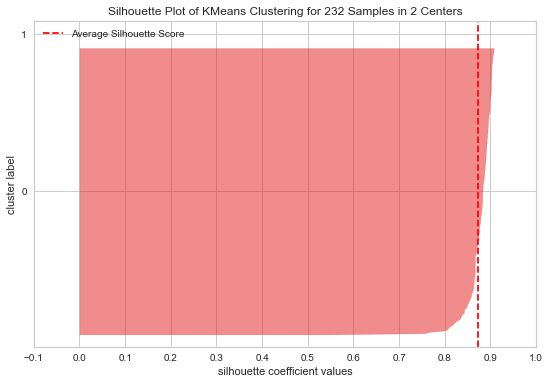

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 232 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [6]:
# Instantiate the clustering model and visualizer
start = 2
model = KMeans(start)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

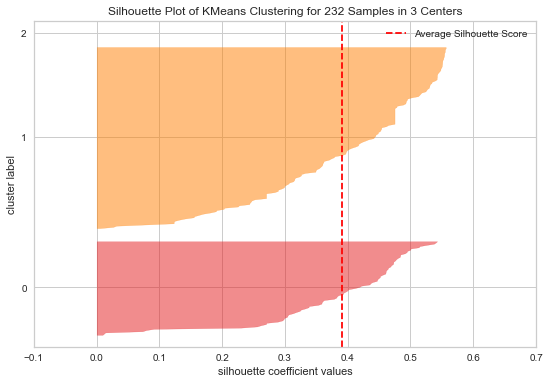

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 232 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [7]:
# Instantiate the clustering model and visualizer
start = start + 1
model = KMeans(start)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

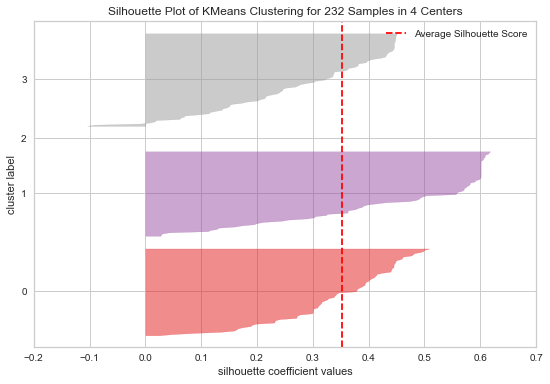

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 232 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [8]:
# Instantiate the clustering model and visualizer
start = start + 1
model = KMeans(start)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

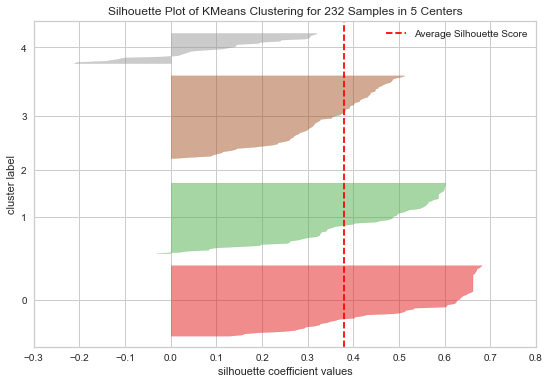

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 232 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [9]:
# Instantiate the clustering model and visualizer
start = start + 1
model = KMeans(start)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

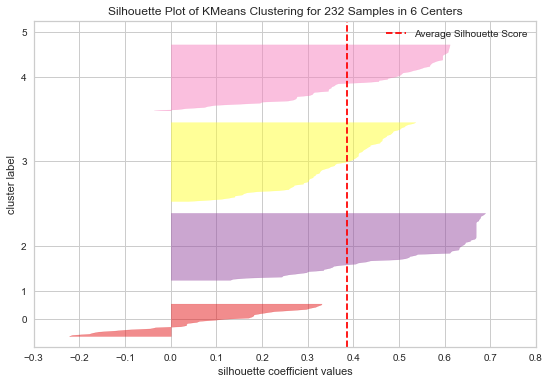

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 232 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [10]:
# Instantiate the clustering model and visualizer
start = start + 1
model = KMeans(start)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

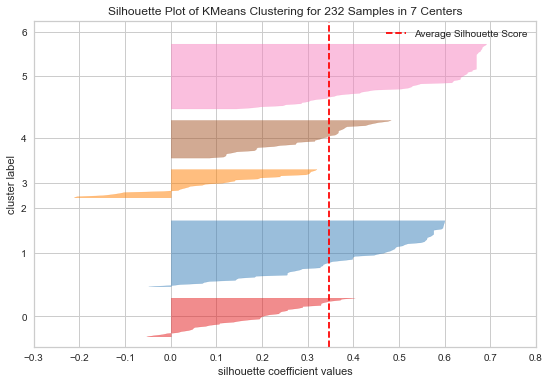

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 232 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [11]:
# Instantiate the clustering model and visualizer
start = start + 1
model = KMeans(start)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

For the next example, let's see what happens when using a non-optimal value for $K$, in this case, 6. 

Now we see that the width of clusters 1 and 2 have both increased and their silhouette coefficient scores have dropped. This occurs because the width of each silhouette is proportional to the number of samples assigned to the cluster. The model is trying to fit our data into a smaller than optimal number of clusters, making two of the clusters larger (wider) but much less cohesive (as we can see from their below-average scores).

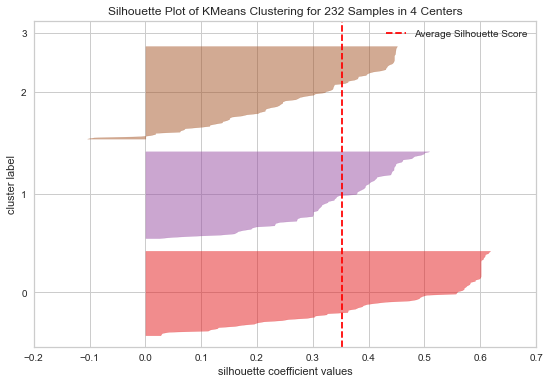

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 232 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [12]:
# Instantiate the clustering model and visualizer 
model = KMeans(4)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

# Intercluster Distance Maps

Intercluster distance maps display an embedding of the cluster centers in 2 dimensions with the distance to other centers preserved, e.g. the closer two centers are in the visualization, the closer they are in the original feature space.

The clusters are sized according to a scoring metric. By default, they are sized by membership, e.g. the number of instances that belong to each center. This gives a sense of the relative importance of clusters. Note however, that because two clusters overlap in the 2D space, it does not imply that they overlap in the original feature space.

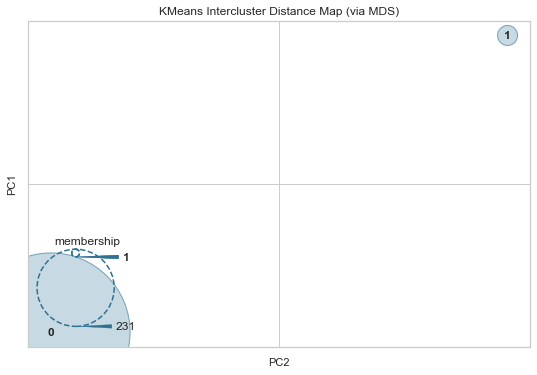

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [13]:
# Generate synthetic dataset with 12 random clusters


# Instantiate the clustering model and visualizer

n = 2
model = KMeans(n)
visualizer = InterclusterDistance(model)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

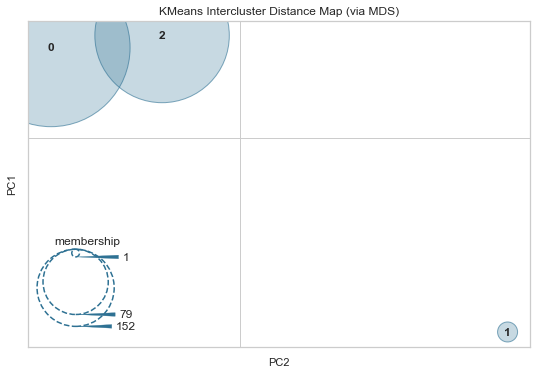

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [14]:
n = n + 1
model = KMeans(n)
visualizer = InterclusterDistance(model)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

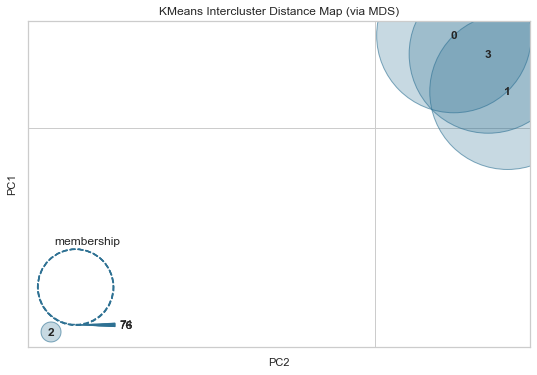

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [15]:
n = n + 1
model = KMeans(n)
visualizer = InterclusterDistance(model)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

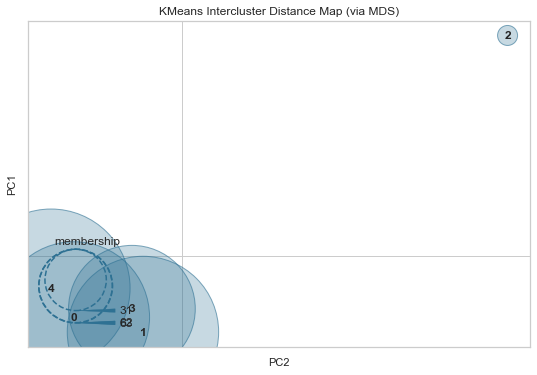

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [16]:
n = n + 1
model = KMeans(n)
visualizer = InterclusterDistance(model)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

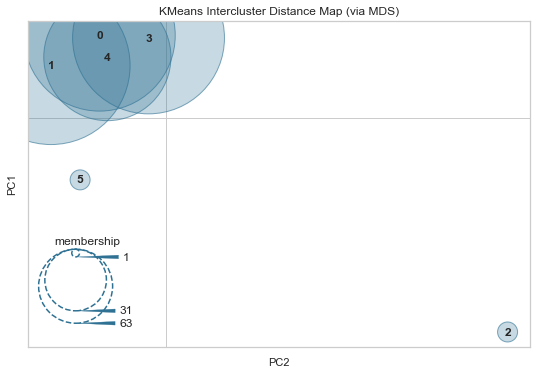

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [17]:
n = n + 1
model = KMeans(n)
visualizer = InterclusterDistance(model)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [18]:
from sklearn.decomposition import PCA

#define PCA model to use
pca = PCA(n_components=10)

#fit PCA model to data
pca_fit = pca.fit(X)

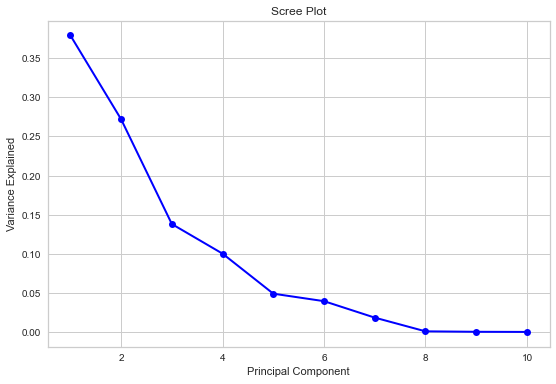

In [19]:
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [23]:

# Importing module and initializing setup
from pycaret.regression import *
reg1 = setup(data = X, target = 'co2', remove_multicollinearity = True, multicollinearity_threshold = 0.9)

,Description,Value
0,session_id,5817
1,Target,co2
2,Original Data,"(232, 37)"
3,Missing Values,False
4,Numeric Features,36
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(162, 7)"


In [24]:
dir(reg1)

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'count',
 'index']

In [26]:
reg1.__getitem__()

TypeError: expected 1 argument, got 0